# 1. Install Dependencies and Setup

In [61]:
import tensorflow as tf
import os
from sklearn import metrics

# 2. Remove dodgy images

In [62]:
import cv2
import imghdr

In [63]:
# data_dir = 'data' 

train_dir = 'data/Train/'
test_dir = 'data/Test/'

In [64]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [65]:
for image_class in os.listdir(train_dir): 
    for image in os.listdir(os.path.join(train_dir, image_class)):
        image_path = os.path.join(train_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [66]:
for image_class in os.listdir(test_dir): 
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [67]:
import numpy as np
from matplotlib import pyplot as plt

In [68]:
# data = tf.keras.utils.image_dataset_from_directory('data') changed from relative path to variable
total_train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=382)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 382 files belonging to 4 classes.
Found 382 files belonging to 4 classes.


In [69]:
print (image_path)

data/Test/Rot_Apple/Rot_Apple11.jpg


In [70]:
print (train_data.class_names)

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


In [71]:
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size=120)

Found 120 files belonging to 4 classes.


In [72]:
# data_iterator = data.as_numpy_iterator()
train_iterator = train_data.as_numpy_iterator()

In [73]:
test_iterator = test_data.as_numpy_iterator()

In [74]:
# batch = data_iterator.next()
train_batch = train_iterator.next()

In [75]:
test_batch = test_iterator.next()

VISUALISE TRAIN AND TEST DATA

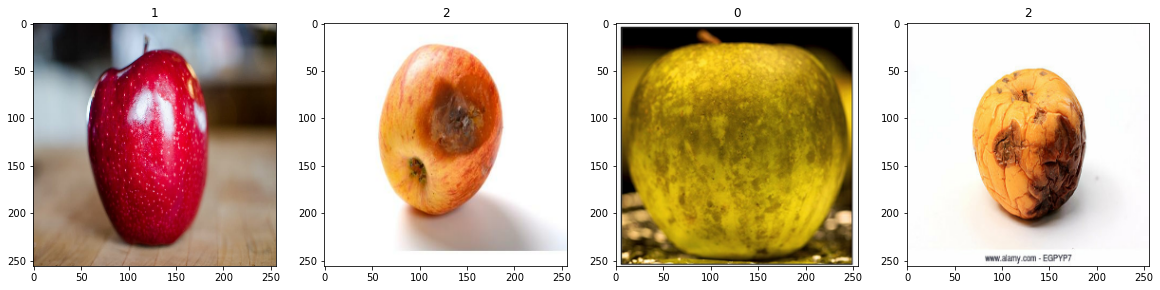

In [76]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

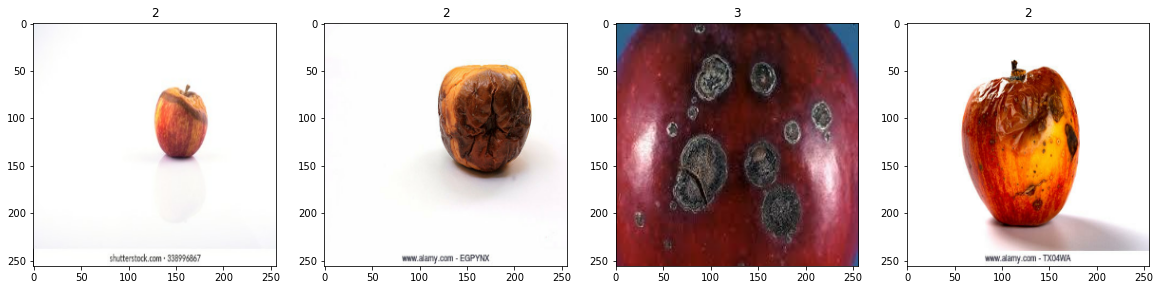

In [77]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(test_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(test_batch[1][idx])

# 4. Scale Data

In [78]:
train_data = train_data.map(lambda x,y: (x/255, y))

In [79]:
test_data = test_data.map(lambda x,y: (x/255, y))

In [80]:
train_data.as_numpy_iterator().next()

(array([[[[7.03921556e-01, 7.03921556e-01, 6.64705873e-01],
          [7.06893384e-01, 7.06893384e-01, 6.67677701e-01],
          [7.13786781e-01, 7.13786781e-01, 6.74571097e-01],
          ...,
          [4.54186112e-01, 4.54186112e-01, 4.46342975e-01],
          [4.36906219e-01, 4.40291643e-01, 4.22292262e-01],
          [4.38740820e-01, 4.42662388e-01, 4.14261639e-01]],
 
         [[7.10217535e-01, 7.10217535e-01, 6.71001852e-01],
          [7.13189363e-01, 7.13189363e-01, 6.73973680e-01],
          [7.20082700e-01, 7.20082700e-01, 6.80867016e-01],
          ...,
          [4.57996309e-01, 4.60845590e-01, 4.51577812e-01],
          [4.42054003e-01, 4.47058827e-01, 4.28864658e-01],
          [4.31020230e-01, 4.37791049e-01, 4.09735352e-01]],
 
         [[7.19060481e-01, 7.19060481e-01, 6.79844797e-01],
          [7.22931981e-01, 7.22931981e-01, 6.83716297e-01],
          [7.27701426e-01, 7.27701426e-01, 6.88485742e-01],
          ...,
          [4.57996309e-01, 4.65839475e-01, 4.5407

In [81]:
test_data.as_numpy_iterator().next()

(array([[[[0.46668175, 0.6090291 , 0.16398764],
          [0.30811   , 0.4420489 , 0.04626818],
          [0.16059504, 0.2691658 , 0.00812773],
          ...,
          [0.16968393, 0.19096422, 0.05820312],
          [0.32545486, 0.36443138, 0.1303751 ],
          [0.7890845 , 0.8251599 , 0.6939032 ]],
 
         [[0.6061692 , 0.73171604, 0.25255105],
          [0.5066817 , 0.63194853, 0.17981648],
          [0.3656245 , 0.48679686, 0.10590279],
          ...,
          [0.1645047 , 0.18931936, 0.0427063 ],
          [0.34265196, 0.3906593 , 0.12724541],
          [0.79691976, 0.8338942 , 0.69500023]],
 
         [[0.7509623 , 0.8475572 , 0.37112933],
          [0.67506176, 0.78217113, 0.31409213],
          [0.5488919 , 0.67777604, 0.22276689],
          ...,
          [0.17939307, 0.21171962, 0.04160114],
          [0.39420855, 0.4561632 , 0.1456102 ],
          [0.8082753 , 0.8467863 , 0.70144594]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# 5. Split Data

In [82]:
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)
test_size = int(len(test_data))

In [83]:
train_size

9

In [84]:
val_size

2

In [85]:
test_size

1

In [86]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
test = test_data.take(test_size)

# 6. Build Deep Learning Model

In [87]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras

In [89]:
model = Sequential()

In [90]:
# Define a simple sequential model
num_classes = 4
# lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
# nrOfEpochs = 5
img_height = 256
img_width = 256
image_size=(img_height, img_width)
batch_size = 32


def create_model():
  model = tf.keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense((num_classes))
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)       

# 7. Train

In [91]:
logdir='logs'

In [92]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [93]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
9/9 [==============================] - 7s 738ms/step - loss: 1.7036 - sparse_categorical_accuracy: 0.2292 - val_loss: 1.3863 - val_sparse_categorical_accuracy: 0.1719
Epoch 2/10
9/9 [==============================] - 7s 681ms/step - loss: 1.3863 - sparse_categorical_accuracy: 0.2222 - val_loss: 1.3863 - val_sparse_categorical_accuracy: 0.2969
Epoch 3/10
9/9 [==============================] - 7s 740ms/step - loss: 1.3863 - sparse_categorical_accuracy: 0.2257 - val_loss: 1.3863 - val_sparse_categorical_accuracy: 0.2812
Epoch 4/10
9/9 [==============================] - 8s 833ms/step - loss: 1.3863 - sparse_categorical_accuracy: 0.2222 - val_loss: 1.3863 - val_sparse_categorical_accuracy: 0.2344
Epoch 5/10
9/9 [==============================] - 7s 701ms/step - loss: 1.3863 - sparse_categorical_accuracy: 0.2118 - val_loss: 1.3863 - val_sparse_categorical_accuracy: 0.2656
Epoch 6/10
9/9 [==============================] - 6s 648ms/step - loss: 1.3863 - sparse_categorical_accuracy: 

# 8. Plot Performance

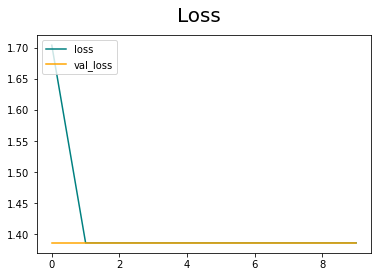

In [94]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [95]:
print(hist.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


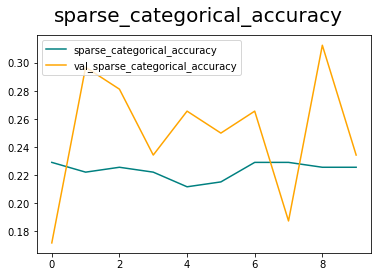

In [96]:
fig = plt.figure()
plt.plot(hist.history['sparse_categorical_accuracy'], color='teal', label='sparse_categorical_accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], color='orange', label='val_sparse_categorical_accuracy')
fig.suptitle('sparse_categorical_accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [97]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [98]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [99]:
len(test)

1

In [100]:
for test_batch in test_data.as_numpy_iterator(): 
    X, y = test_batch
    yhat = model.predict(X)
    pred = np.argmax(yhat, axis=-1)
    # pre.update_state(y, yhat)
    # re.update_state(y, yhat)
    # acc.update_state(y, yhat)

    print (pred)
    print (y)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3]
[0 0 1 3 2 2 3 3 1 1 0 0 0 2 2 3 1 2 3 3 0 1 2 0 1 2 0 2 3 0 0 0 3 3 3 0 3
 3 3 2 2 1 2 0 1 0 1 0 1 2 0 0 3 0 0 3 2 2 0 3 2 1 2 1 3 2 2 2 1 1 2 2 3 0
 2 3 1 3 0 2 2 1 2 0 3 2 1 0 3 2 2 3 1 0 2 2 1 2 3 2 0 0 1 2 2 2 3 3 2 1 1
 3 3 2 1 0 1 0 0 2]


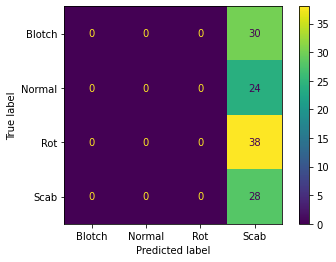

In [101]:

# plt.plot(history.history['accuracy'], label='Train accuracy')
# plt.plot(history_test.history['accuracy'], label = 'Test accuracy')

actual = y
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

cm_display.plot()
plt.show()

In [102]:
testscore = model.evaluate(test_data)

1/1 [==============================] - 1s 639ms/step - loss: 1.3863 - sparse_categorical_accuracy: 0.2333


In [103]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [104]:
import cv2

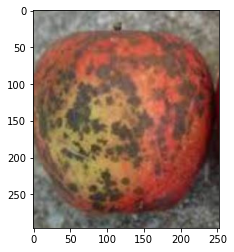

In [105]:
img = cv2.imread('data/Test/Blotch_Apple/Blotch_Apple1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

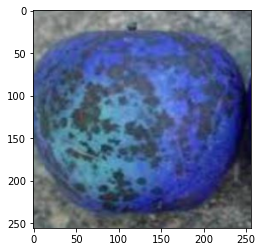

In [106]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [107]:
yhat = model.predict(np.expand_dims(resize/255, 0))
pred = np.argmax(yhat, axis=-1)

In [108]:
if pred == [3]: print ('the model predicts an apple with scab')
elif pred == [2]: print ('the model predicts an apple with rot')
elif pred == [1]: print ('the model predicts this is a normal healthy apple')
elif pred == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts an apple with scab


if num > 0:
    print("Positive number")
elif num == 0:
    print("Zero")
else:
    print("Negative number")

# 11. Save the Model and test loading the Model

In [109]:
from tensorflow.keras.models import load_model

In [110]:
model.save(os.path.join('models','appleclassifier41.h5'))

In [111]:
new_model = load_model('models/appleclassifier41.h5')

In [112]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)       

In [113]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

In [114]:
pred_new = np.argmax(yhat_new, axis=-1)

In [115]:
if pred_new == [3]: print ('the model predicts an apple with scab')
elif pred_new == [2]: print ('the model predicts an apple with rot')
elif pred_new == [1]: print ('the model predicts this is a normal healthy apple')
elif pred_new == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts an apple with scab


De vragen die ik bij 2_1 nog had zijn beantwoord door uitwerking 

Nieuwe vraag:

voor het aanmaken van de data moet ik soms onderstaand commando runnen bij foutmelding:

find . -name "*.DS_Store" -type f -delete

wat is dit?


Van to do 1_2 zijn confusion matrix en plots afgehandeld

new to do - 
To do - image rescalen naar 100x100
expirimenteren met model / dataset en augmentation
transfer learning